# Poschl-Teller Potential

$ V(x) = \dfrac{1}{2}\,\text{sech}^2(x) = \dfrac{2}{(e^{-x}+e^x)^2} $

### Schrödinger equation after change of coordinates

$ \dfrac{d^2\psi}{dx^2} + \left( \omega^2 - \dfrac{1}{2}\text{sech}^2(x) \right)\psi = 0 \implies  \dfrac{d^2\phi}{dy^2} = \dfrac{2y(1-iw)}{1-y^2}\dfrac{d\phi}{dy} + \dfrac{1-2iw-2w^2}{2(1-y^2)}\phi $

$ \text{where } y = \text{tanh}(x) $

### QNM Boundary Conditions

$ \phi = (1-y)^{-iw/2}(1+y)^{-iw/2} $

$ \text{which fulfills } y \rightarrow 1 \implies \psi \sim e^{\mp iwx} \sim (1-y)^{\pm iw/2} \implies \psi \sim (1-y)^{-iw/2} $

$ \text{and } y \rightarrow -1 \implies \phi \sim e^{\pm iwx} \sim (1+y)^{\pm iw/2} \implies \psi \sim (1+y)^{-iw/2} $

### Parameters

$ \lambda_0 = \dfrac{2y(1-iw)}{1-y^2} \qquad s_0 = \dfrac{1-2iw-2w^2}{2(1-y^2)} $

### AIM Method
$ \lambda_n = \lambda'_{n-1} + s_{n-1} + \lambda_0\lambda_{n-1} \qquad s_n = s'_{n-1} + s_0\lambda_{n-1} $


Quantization condition: $ \delta_n = s_n\lambda_{n-1} - s_{n-1}\lambda_n $

# AIM (simple) algorithm

Import necessary libraries

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

N = 1000

y = symbols("y", real=True)
w = symbols("\omega")

l = np.empty(N,dtype=object)
lp = np.empty(N,dtype=object)
s = np.empty(N,dtype=object)
sp = np.empty(N,dtype=object)

d = np.empty(N,dtype=object)

l[0] = (2*y*(1-I*w))/(1-y**2)
s[0] = (1-2*I*w-2*w**2)/(2*(1-y**2))

First, find the maximum/minimum value of the potential to evaluate at

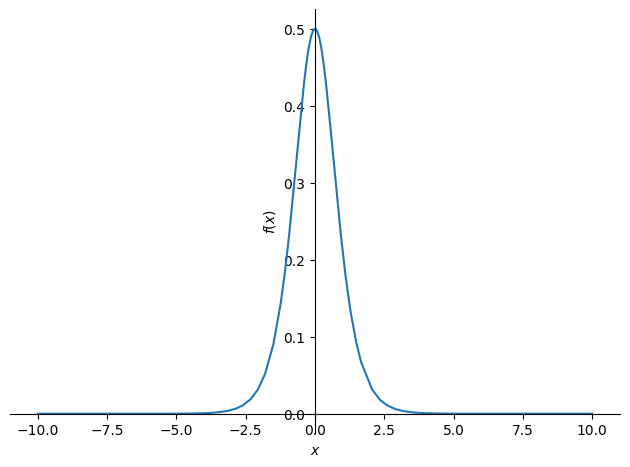

In [152]:
x = symbols("x", real=True)
V = 2/( ( E**(-x) + E**x )**2 )
p1 = plot(V)
p1

In [158]:
Vp = diff(V,x)
critp = solve(Vp,x)
critp

[0]

Next, compute first derivatives of lambda and s parameters

In [113]:
lp[0] = diff(l[0],y)
sp[0] = diff(s[0],y)

In [139]:
lp[0]

4*y**2*(-I*\omega + 1)/(1 - y**2)**2 + 2*(-I*\omega + 1)/(1 - y**2)

In [140]:
sp[0]

4*y*(-2*\omega**2 - 2*I*\omega + 1)/(2 - 2*y**2)**2

Calculate n-th (1st) values of lambda and s parameter

In [114]:
l[1] = lp[0]+s[0]+l[0]*l[0]
s[1] = sp[0] + s[0]*l[0]

In [148]:
series(l[1],y,x0=0,n=5)

5/2 + y**2*(-\omega**2 - 7*I*\omega + 4*(-I*\omega + 1)**2 + 13/2) + y**4*(-\omega**2 - 11*I*\omega + 8*(-I*\omega + 1)**2 + 21/2) - 3*I*\omega - \omega**2 + O(y**5)

In [149]:
series(s[1],y,x0=0,n=5)

y*(2*I*\omega**3 - 6*\omega**2 - 5*I*\omega + 2) + y**3*(4*I*\omega**3 - 12*\omega**2 - 10*I*\omega + 4) + O(y**5)

Evaluate the quantization condition $\delta_n$ at point $y = 0$ obtaining polynomial in $\omega$

In [142]:
d[1] = s[1]*l[0] - s[0]*l[1]
#d[1].subs(y,0)
p = simplify(d[1].subs(y,0))
d[1]


2*y*(-I*\omega + 1)*(4*y*(-2*\omega**2 - 2*I*\omega + 1)/(2 - 2*y**2)**2 + 2*y*(-I*\omega + 1)*(-2*\omega**2 - 2*I*\omega + 1)/((1 - y**2)*(2 - 2*y**2)))/(1 - y**2) - (-2*\omega**2 - 2*I*\omega + 1)*(4*y**2*(-I*\omega + 1)**2/(1 - y**2)**2 + 4*y**2*(-I*\omega + 1)/(1 - y**2)**2 + (-2*\omega**2 - 2*I*\omega + 1)/(2 - 2*y**2) + 2*(-I*\omega + 1)/(1 - y**2))/(2 - 2*y**2)

In [143]:
p

-\omega**4 - 4*I*\omega**3 + 6*\omega**2 + 4*I*\omega - 5/4

Solve the polynomial for the solution of $\omega$, taking only those with negative imaginary part and positive real part

In [116]:
sols = solve(p)
print("All solutions: " + str(sols))
print("Filtered solutions:")
for i in range(len(sols)):
    if re(sols[i]) > 0 and  im(sols[i]) < 0:
        print("w_" + str(i+1) + " = " + str(sols[i]))

All solutions: [-1/2 - 3*I/2, -1/2 - I/2, 1/2 - 3*I/2, 1/2 - I/2]
Filtered solutions:
w_3 = 1/2 - 3*I/2
w_4 = 1/2 - I/2


### Second Iteration

In [119]:
lp[1] = diff(l[1],y)
sp[1] = diff(s[1],y)
l[2] = lp[1] + s[1] + l[0]*l[1]
s[2] = sp[1] + s[0]*l[1]

In [135]:
d[2] = s[2]*l[1] - s[1]*l[2]
d[2]

-(4*y*(-2*\omega**2 - 2*I*\omega + 1)/(2 - 2*y**2)**2 + 2*y*(-I*\omega + 1)*(-2*\omega**2 - 2*I*\omega + 1)/((1 - y**2)*(2 - 2*y**2)))*(16*y**3*(-I*\omega + 1)**2/(1 - y**2)**3 + 16*y**3*(-I*\omega + 1)/(1 - y**2)**3 + 8*y*(-2*\omega**2 - 2*I*\omega + 1)/(2 - 2*y**2)**2 + 2*y*(-I*\omega + 1)*(4*y**2*(-I*\omega + 1)**2/(1 - y**2)**2 + 4*y**2*(-I*\omega + 1)/(1 - y**2)**2 + (-2*\omega**2 - 2*I*\omega + 1)/(2 - 2*y**2) + 2*(-I*\omega + 1)/(1 - y**2))/(1 - y**2) + 2*y*(-I*\omega + 1)*(-2*\omega**2 - 2*I*\omega + 1)/((1 - y**2)*(2 - 2*y**2)) + 8*y*(-I*\omega + 1)**2/(1 - y**2)**2 + 12*y*(-I*\omega + 1)/(1 - y**2)**2) + (4*y**2*(-I*\omega + 1)**2/(1 - y**2)**2 + 4*y**2*(-I*\omega + 1)/(1 - y**2)**2 + (-2*\omega**2 - 2*I*\omega + 1)/(2 - 2*y**2) + 2*(-I*\omega + 1)/(1 - y**2))*(32*y**2*(-2*\omega**2 - 2*I*\omega + 1)/(2 - 2*y**2)**3 + 8*y**2*(-I*\omega + 1)*(-2*\omega**2 - 2*I*\omega + 1)/((1 - y**2)*(2 - 2*y**2)**2) + 4*y**2*(-I*\omega + 1)*(-2*\omega**2 - 2*I*\omega + 1)/((1 - y**2)**2*(2 -

In [164]:
p = simplify(d[2].subs(y,0))
p

-\omega**6 - 9*I*\omega**5 + 65*\omega**4/2 + 60*I*\omega**3 - 241*\omega**2/4 - 129*I*\omega/4 + 65/8

In [165]:
sols = solve(p)
print("All solutions: " + str(sols))
print("Filtered solutions:")
for i in range(len(sols)):
    if re(sols[i]) > 0 and  im(sols[i]) < 0:
        print("w_" + str(i+1) + " = " + str(sols[i]))

All solutions: [-1/2 - 5*I/2, -1/2 - 3*I/2, -1/2 - I/2, 1/2 - 5*I/2, 1/2 - 3*I/2, 1/2 - I/2]
Filtered solutions:
w_4 = 1/2 - 5*I/2
w_5 = 1/2 - 3*I/2
w_6 = 1/2 - I/2


### Third iteration

In [137]:
lp[2] = diff(l[2],y)
sp[2] = diff(s[2],y)
l[3] = lp[2] + s[2] + l[0]*l[2]
s[3] = sp[2] + s[0]*l[2]
d[3] = s[3]*l[2] - s[2]*l[3]
p = simplify(d[3].subs(y,0))
sols = solve(p)
print("All solutions: " + str(sols))
print("Filtered solutions:")
for i in range(len(sols)):
    if re(sols[i]) > 0 and  im(sols[i]) < 0:
        print("w_" + str(i+1) + " = " + str(sols[i]))

All solutions: [-1/2 - 7*I/2, -1/2 - 5*I/2, -1/2 - 3*I/2, -1/2 - I/2, 1/2 - 7*I/2, 1/2 - 5*I/2, 1/2 - 3*I/2, 1/2 - I/2]
Filtered solutions:
w_5 = 1/2 - 7*I/2
w_6 = 1/2 - 5*I/2
w_7 = 1/2 - 3*I/2
w_8 = 1/2 - I/2


### Fourth iteration

In [146]:
lp[3] = diff(l[3],y)
sp[3] = diff(s[3],y)
l[4] = lp[3] + s[3] + l[0]*l[3]
s[4] = sp[3] + s[0]*l[3]
d[4] = s[4]*l[3] - s[3]*l[4]
p = simplify(d[4].subs(y,0))
sols = solve(p)
print("All solutions: " + str(sols))
print("Filtered solutions:")
for i in range(len(sols)):
    if re(sols[i]) > 0 and  im(sols[i]) < 0:
        print("w_" + str(i+1) + " = " + str(sols[i]))

All solutions: [-1/2 - 9*I/2, -1/2 - 7*I/2, -1/2 - 5*I/2, -1/2 - 3*I/2, -1/2 - I/2, 1/2 - 9*I/2, 1/2 - 7*I/2, 1/2 - 5*I/2, 1/2 - 3*I/2, 1/2 - I/2]
Filtered solutions:
w_6 = 1/2 - 9*I/2
w_7 = 1/2 - 7*I/2
w_8 = 1/2 - 5*I/2
w_9 = 1/2 - 3*I/2
w_10 = 1/2 - I/2
